In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import missingno as msno
import datetime as dt
plt.style.use('dark_background')

In [30]:
adult_dat = pd.read_csv("C:/Users/Erich Curtis/Spring ML 2020/KNN/adult-census-income-data/adult_data.csv",header=None)
adult_dat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
adult_dat.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
               "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
               "hours-per-week", "native-country","Above or Below"]
adult_dat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Above or Below
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
cat_columns = ["workclass","education","marital-status",
               "occupation","relationship","race","sex",
               "native-country","Above or Below"]
cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Above or Below']

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dat = adult_dat.copy()
dat[cat_columns] = dat[cat_columns].apply(lambda col: le.fit_transform(col))
dat[cat_columns].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Above or Below
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


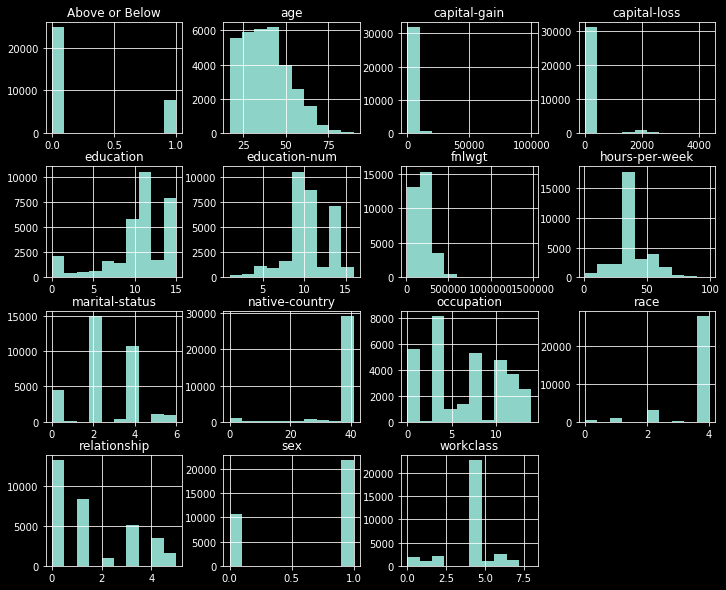

In [34]:
dat.hist(figsize=(12,10))
plt.show()

I would like to see my most skewed data and apply the euclidean distance formula to that to see what the KNN algorithm will produce.

For this I will use:
* Age
* Education
* Race
* Relationship
* Work Class

In [35]:
columns_to_test = ["age","education","race","relationship","workclass"]

point_df = dat.drop("Above or Below",axis=1)
target = dat["Above or Below"]
print(target.head())
point_df.head()

0    0
1    0
2    0
3    0
4    0
Name: Above or Below, dtype: int32


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [36]:
def eucl_dst(a,b):
    return np.sqrt(sum((np.square(a-b))))

In [37]:
def make_dist_col(index):
    a = point_df.iloc[index].values
    m = []
    n = len(dat)
    for i in range(0,n):
        b = point_df.iloc[i].values
        m.append(eucl_dst(a,b))
    return m

In [38]:
def KNN(index,k_neighbors):
    a = point_df.copy()
    a["distance"] = make_dist_col(point)
    a = a.sort_values(by="distance",ascending=True)
    a = a.head(k_neighbors)
    return a,target.loc[a.index],adult_dat.loc[a.index]

In [39]:
point = np.random.randint(0,len(adult_dat))
result = KNN(point,100)

In [40]:
result[0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,distance
13985,44,4,134120,11,9,2,1,5,4,0,0,0,40,39,0.000000
11359,41,4,134130,9,13,2,12,0,4,1,0,0,50,39,19.390719
9653,25,4,134113,9,13,4,1,1,4,1,0,0,30,39,23.473389
26721,41,6,134130,11,9,2,5,0,4,1,0,0,60,39,23.558438
8812,37,4,134088,7,12,4,1,1,4,0,0,0,40,39,33.436507
386,29,4,134152,11,9,5,7,1,4,1,0,0,40,39,36.207734
32490,60,0,134152,6,5,0,0,1,2,1,0,0,35,39,37.255872
32116,56,4,134153,0,6,2,1,0,2,1,0,0,40,39,37.322915
12181,27,4,134152,11,9,2,7,0,4,1,0,0,45,39,37.416574
27259,66,4,134130,9,13,6,8,1,4,1,0,0,12,39,38.340579


In [41]:
result[1]

13985    1
11359    1
9653     0
26721    0
8812     0
386      0
32490    0
32116    0
12181    0
27259    0
3558     0
8744     0
27455    0
13077    0
14552    0
13838    0
20501    0
26043    0
28412    0
2596     0
18924    0
25550    0
12474    0
29537    0
1969     1
20193    1
8066     0
7055     0
14602    0
11793    0
        ..
10217    0
30357    0
9383     0
4381     1
16931    0
12014    0
26294    0
5037     0
5977     1
30535    0
31825    1
7923     0
20012    0
5811     0
27606    0
27393    0
30845    0
11965    0
5837     0
10369    0
15478    0
17166    0
32177    0
9280     0
31088    0
15720    0
3405     0
27845    0
3881     0
30693    0
Name: Above or Below, Length: 100, dtype: int32

In [42]:
result[2]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Above or Below
13985,44,Private,134120,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
11359,41,Private,134130,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
9653,25,Private,134113,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,30,United-States,<=50K
26721,41,Self-emp-not-inc,134130,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
8812,37,Private,134088,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
386,29,Private,134152,HS-grad,9,Separated,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
32490,60,?,134152,9th,5,Divorced,?,Not-in-family,Black,Male,0,0,35,United-States,<=50K
32116,56,Private,134153,10th,6,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,40,United-States,<=50K
12181,27,Private,134152,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
27259,66,Private,134130,Bachelors,13,Widowed,Other-service,Not-in-family,White,Male,0,0,12,United-States,<=50K


***
# Using Principal Component Analysis
***
Whenever one encounters multi dimensional data it would be nice to produce a 2d graph to visualize where these values all sit when plotted down into 2-d space. PCA solves this multi feature data visualization nicely.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(result[0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principal_components
             , columns = ['pc1', 'pc2'])

In [45]:
principalDf.head()

,pc1,pc2
0,-2.342239,0.030156
1,1.558669,-1.397211
2,-0.183984,0.012762
3,1.556739,-0.641930
4,-1.043840,0.141478


In [46]:
target = result[1].reset_index()["Above or Below"]

In [47]:
target = result[1].reset_index()["Above or Below"]
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf.head(10)

,pc1,pc2,Above or Below
0,-2.342239,0.030156,1
1,1.558669,-1.397211,1
2,-0.183984,0.012762,0
3,1.556739,-0.641930,0
4,-1.043840,0.141478,0
5,0.309150,-0.139084,0
6,0.669649,3.687516,0
7,1.251090,2.840831,0
8,0.981102,-0.309617,0
9,-0.048228,0.483487,0


In [78]:
finalDf.loc[0]

-2.342238891173939

In [48]:
adult_dat.iloc[point]

age                                44
workclass                     Private
fnlwgt                         134120
education                     HS-grad
education-num                       9
marital-status     Married-civ-spouse
occupation               Adm-clerical
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country          United-States
Above or Below                   >50K
Name: 13985, dtype: object

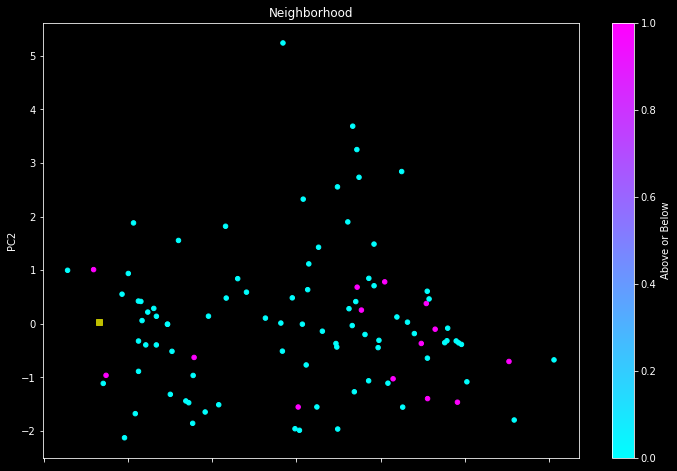

In [118]:
ax = finalDf.plot.scatter(x="pc1",y="pc2",c='Above or Below',colormap='cool',figsize=(12,8))
ax.plot(-2.342239,0.030156,"ys")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.title("Neighborhood")
plt.show()

count    100.000000
mean     275.152186
std      167.940720
min        0.000000
25%      151.929260
50%      247.335779
75%      427.434292
max      584.738403
Name: distance, dtype: float64


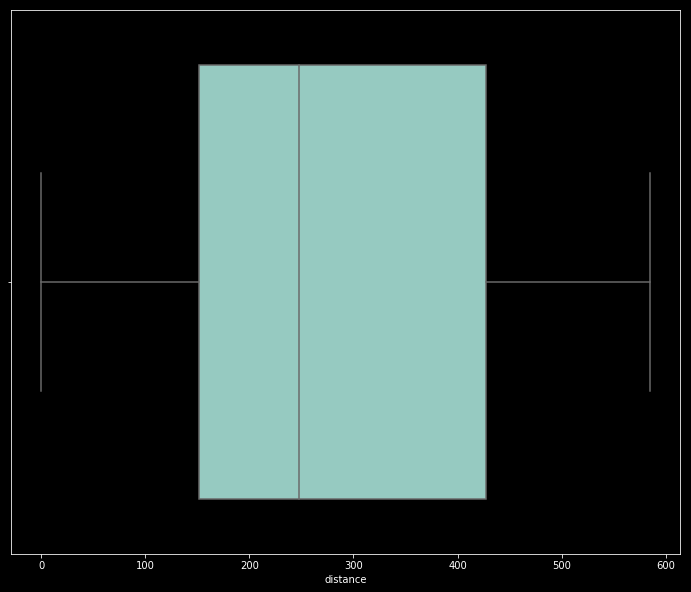

In [112]:
print(result[0]['distance'].describe())
plt.figure(figsize=(12,10))
sns.boxplot(result[0]['distance'])
plt.show()